# Machine Learning: Homework 4 - Jose Vazquez-Espinoza

Algorithm's implementation in: https://github.com/

In [1]:
import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib
import random
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split #Just to separate train and test set
%matplotlib inline

#Implementation of Own Algorithm
from ML_Algorithms import GaussianMixtures as gm
from ML_Algorithms import Optimization_methods as om
from ML_Algorithms import Classifiers
from ML_Algorithms import metrics
from ML_Algorithms import Logistic_Regression as logreg
from ML_Algorithms import utils

## Part 1 (BISHOP):

5.5 ) how that maximazing likelihood for a multiclass neural network model in which the network outputs have the interpretation $y_k(\mathbf{x}, \mathbf{w}) = p(t_k = 1 \mid x)$ is equivalent to the minimization of the cross-entropy error function 
$$ E(\mathbf{w})= -\sum_{n=1}^N \sum_{k=1}^K t_{kn} \ln y_k (\mathbf{x}_n, \mathbf{w})$$


5.10 ) Consider a Hessian matrix $\mathbf{H}$ with eigenvector equation

$$ \mathbf{H u}_i = \lambda_i \mathbf{u}_i$$

By setting the vector $\mathbf{v}$ in

$$\mathbf{v}^T \mathbf{Hv} = \sum_i c_i^2 \lambda_i$$

equal to each of the eigenvectors $\mathbf{u}_i$ in turn, show that $\mathbf{H}$ is positive definite if, and only if, all of its eigenvalues are positive.


9.4 )
uppose we wish to use EM algorithm to maximize the posterior distribution over parameters $p(\theta|X)$ for a model containing latent variables, where $X$ is observed data set. Show that E step remains the same as in the maximum likelihood case, whereas in the M step the quantity to be maximized is given by $$\vartheta(\theta,\theta^{old}+\ln p(\theta))$$ where $$\vartheta(\theta,\theta^{old})$$ is defined by 

$$Q(\mathbf{\theta, \theta}^{old}) = \sum_{\mathbf{z}} p (\mathbf{Z} | \mathbf{X, \theta}^{old}) \ln p(\mathbf{X}, \mathbf{Z} | \mathbf{\theta})$$

9.11 )
In section 9.3.2 we obtained a relationship between $K$ means and EM for Gaussian Mixture by considering a mixture model in which all components have covariance $\epsilon I$. Show that in the limit $\epsilon \rightarrow 0$, maximize the expected complete data log likelihood for his model, given by

$$\mathop{\mathbb{E_z}} = \lbrack \ln p(\mathbf{X,Z | \mu, \Sigma, \pi}) \rbrack = \sum_{n=1}^N \sum_{k=1}^K \gamma(z_{nk}) \{ \ln \pi_k + \ln \mathscr{N}( \mathbf{x_n | \mu_k, \Sigma_k)}\} $$

is equivalent to minimizing the distortion measure $J$ for the K-means algorithm given by 

$$J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} || \mathbf{x}_n - \mathbf{\mu}_k ||^2 $$

9.15 ) Show that if we maximize the expected complete-data log likelihood function 
(9.55) 

$$ \mathop{\mathbb{E_z}} = \lbrack \ln p(\mathbf{X,Z | \mu, \pi}) \rbrack = \sum_{n=1}^N \sum_{k=1}^K \gamma(z_{nk}) \big\{ \ln \pi_k + \sum_{i=1}^D \lbrack x_{ni} \ln \mu_{ki} + (1 - x_{ni}) \ln (1 - \mu_ {ki} ) \rbrack   \big\} $$

for a mixture of Bernoulli distribution with respect to $\mu_k$, we obtain the M step equation

$$\pi_k = \frac{N_k}{N}$$

## Part 2 (HAYKIN):

4.4 ) The momentum constant ()' is normally assigned a positive value in the range $0 \leq \alpha < 1$.
Investigate the difference that would be made in the behavior of Eq. (4.41) with respect
to time t if $\alpha$ was assigned a negative value in the range $-1 \leq \alpha < 0$.

4.6 ) In Section 4.7 we presented qualitative arguments for the property of a multilayer per-ceptron classifier (using a logistic function for nonlinearity) that its outputs provide estimates of the a posteriori class probabilities. This property assumes that the size of the training set is large enough, and that the back-propagation algorithm used to train the network does not get stuck at a local minimum. Fill in the mathematical details of this property.

6.6 ) The inner-product kernel kernel $K(X_{i}, K_{j})$ is evaluated over a training sample $\mathscr{T}$ of size N, yield-ing the N-by-N matrix: 
$$K = \left \{ K_{ij} \right \}_{i,j=1}^{N}$$

where $K_{ij} = K(X_{i},X_{j})$. The matrix K is positive in that all of its elements have positive values. Using the similarity transformation: 

$$K = Q \Delta Q^{T}$$

where $\Delta$ is a diagonal matrix of eigenvalues and Q is a matrix made up of the corresponding eigenvectors, formulate an expression for the inner-product kernel $K(X_{i}, X_{j})$ in terms of the eigenvalues and eigenvectors of matrix K. What conclusions can you draw from this representation?

6.13 ) Compare the virtues and limitations of support vector machines with those of radial-basis function (RBF) networks with respect to the following task: 

* (1) Pattern classification 
* (2) Nonlinear regression . 

Do the same for support vector machines versus multilayer perceptron trained using the back propagation algorithm


6.15 ) The computer experiment described in section 6.6 was for the classification of two overlapping Gaussian Distributions. The following "regularization" parameter was used in that experiment: C = 0.1 The common width of the radial-basis functions used for con-structing the inner-product kernels was $\sigma ^{2} = 4$. Repeat the computer experiment described in that section for the following two values of the regularization parameter:

* C = 0.05
* C = 0.2

## Part 3:

Implement using Python the EM algorithm for the mixture of Gaussians. 
    

After this:
* Create two classes composed of k Gaussians splitting the set in

    1. 90% random training data
    2. 10% random testing data

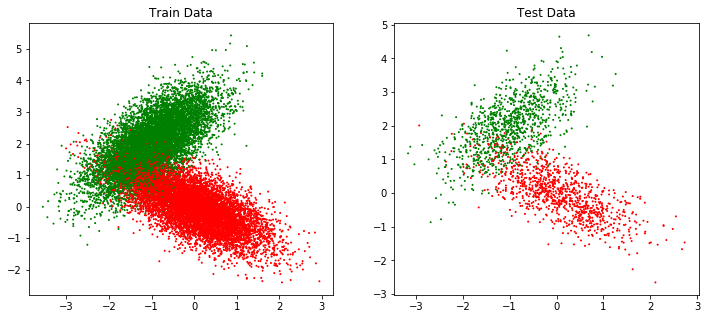

In [2]:
#Data set Initialization

no_samples = 10000

std = [[0.5, 0.4], [0.4,0.7]]
std2 = [[0.7, -0.4], [-0.4,0.5]]
c1 = np.random.multivariate_normal([-1, 2], std, no_samples);
c2 = np.random.multivariate_normal([0, 0], std2, no_samples);
X  = np.concatenate([c1,c2])

labels = np.ones(no_samples)
labels2 = 0 * np.ones(no_samples)
Y = np.concatenate([labels, labels2])
Y = Y.reshape((Y.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=3)

label_train = list(y_train.ravel())
label_test = list(y_test.ravel())
colors = ['red','green']

f, axarr = plt.subplots(1, 2, figsize=(12,5))
axarr[0].scatter(X_train[:,0], X_train[:,1], c=label_train, 
                 cmap=matplotlib.colors.ListedColormap(colors), s = 1)
axarr[0].set_title("Train Data")
axarr[1].scatter(X_test[:,0], X_test[:,1], c=label_test, 
                 cmap=matplotlib.colors.ListedColormap(colors), s = 1)
axarr[1].set_title("Test Data")
plt.show()

    
* Adjust the Gaussian Mixture to such classes. 

Now we can run the expectation maximization algorith with two random gaussian distributions and we obtain an approximation of the mean and the covariance of the distributions used to generate the data.


Lets create a class for the multivariate gaussian distribution, with a method which gives us a probability given a point.

In [3]:
class MultivariateGaussian:
    """
    Implementation of Multivariate Gaussian Distribution
    """
    def __init__(self, mu, sigma):
        """
        Initialization of a Multivariate Gaussian distribution, we do precomputation to
        avoid extra computation in further methods.
        :param mu: Vertical vector of the mean
        :param sigma: Covariance Matrix
        """
        self.mu = mu
        self.sigma = sigma
        self.inv_sigma = np.linalg.pinv(sigma)
        self.det_sigma = np.linalg.det(sigma)

    def pdf(self, x):
        """
        Estimating probability at a single point
        :param x: datapoint must be the same size as mu
        :return: probability of this datapoint
        """
        if x.shape != (x.shape[0], 1):
            x = x.reshape((x.shape[0], 1))
        u = (x - self.mu)
        z = - 1/2.0 * np.dot(np.dot(u.T, self.inv_sigma), u)
        norm_factor = (1/((2*np.pi)**(self.mu.shape[0]/2.0)))*(1/np.sqrt(self.det_sigma))
        p_x = norm_factor * np.exp(z)

        return float(p_x)

Now we are going to create the gaussian mixture model and fit it using expectation maximization

In [4]:
class GaussianMixture:
    """
    Model Mixture of n multivariate Gaussian Distributions
    """

    def __init__(self,
                 data,
                 clusters=2,
                 ):
        """
        Random initialization of mean vector,
        Covariance Matrix initialized with Identity Matrix
        :param data: Data used by the parameters
        :param clusters: Number of clusters to fit
        """

        self.data = data
        self.clusters = clusters
        self.dists = {}
        self.mix = {}
        self.n = self.data.shape[0]
        self.d = self.data.shape[1]
        self.log_likelihood = 0
        mins = np.min(data, axis=0)
        maxs = np.max(data, axis=0)
        for i in range(clusters):
            self.dists["dist" + str(i)] = \
            MultivariateGaussian(random.uniform(mins, maxs).reshape(mins.shape[0], 1),
                                                               np.identity(mins.shape[0]))
            self.mix["dist" + str(i)] = 1.0/self.clusters

    def expectation(self):
        """
        Expectation Step for Gaussian Mixtures
        :return: Parameters
        """
        # Initializing dictionary to store probabilities of n clusters
        prob_z = {}
        probs = {}

        self.log_likelihood = 0
        for i in range(self.clusters):
            probs["cluster" + str(i)] = np.zeros((self.data.shape[0], 1))

        for n in range(self.data.shape[0]):

            for i in range(self.clusters):
                prob_z["cluster" + str(i)] = \
                self.dists["dist" + str(i)].pdf(self.data[n]) * self.mix["dist" + str(i)]

            # Normalization Factor
            den = sum(prob_z.values())
            # Normalize!
            sume = 0
            for i in range(self.clusters):
                prob_z["cluster" + str(i)] /= den
                sume += prob_z["cluster" + str(i)]

            self.log_likelihood += np.log(sume)

            for i in range(self.clusters):
                probs["cluster" + str(i)][n] = prob_z["cluster" + str(i)]

        return probs

    def maximization(self,  probs):

        # Updating the means
        accu_sigma = {}

        for i in range(self.clusters):

            den = np.sum(probs["cluster" + str(i)])
            self.dists["dist" + str(i)].mu = (np.sum(probs["cluster" + str(i)] * self.data, axis=0,
                                                     keepdims=True) / den).T

            accu_sigma["cluster" + str(i)] = np.zeros((self.d, self.d))

            for j in range(self.n):
                u = self.data[j].reshape((self.d, 1)) - self.dists["dist" + str(i)].mu
                accu_sigma["cluster" + str(i)] += probs["cluster" + str(i)][j] * np.dot(u, u.T)

            self.dists["dist" + str(i)].sigma = accu_sigma["cluster" + str(i)]/den
            self.mix["dist" + str(i)] = den / self.n

    def fit(self, iters=10, to_print=False):

        if to_print:
            for i in range(self.clusters):
                mu = self.dists["dist" + str(i)].mu
                cov = self.dists["dist" + str(i)].sigma
                print("Iter 0 dist " + str(i + 1) + " mean: " 
                      + str(mu) + " covariance: " + str(cov))

        for j in range(1, iters + 1):
            self.maximization(self.expectation())
            if to_print:
                for i in range(self.clusters):
                    mu = self.dists["dist" + str(i)].mu
                    cov = self.dists["dist" + str(i)].sigma
                    print("Iter " + str(j) + " dist " + str(i + 1) + 
                          " mean: " + str(mu) + " covariance: " + str(cov))
            else:
                if j == iters:
                    for i in range(self.clusters):
                        mu = self.dists["dist" + str(i)].mu
                        cov = self.dists["dist" + str(i)].sigma
                        print(" dist " + str(i + 1))
                        print(" mean: ")
                        print(mu)
                        print(" covariance: ")
                        print(cov)

Now lets fit our gaussian mixture model and plot it on top of the generated data

In [5]:
#Initializing Gaussian Mixture model
mixture = gm.GaussianMixture(X_train, clusters=2)
mixture.fit(iters=6)

 dist 1
 mean: 
[[-0.1412099 ]
 [ 0.18680598]]
 covariance: 
[[ 0.86156033 -0.49648226]
 [-0.49648226  0.80194095]]
 dist 2
 mean: 
[[-0.91054466]
 [ 1.93321255]]
 covariance: 
[[ 0.50290808  0.23427637]
 [ 0.23427637  0.8411615 ]]


In [6]:
mixture.dists["dist0"].sigma[0,0]

0.86156033445393776

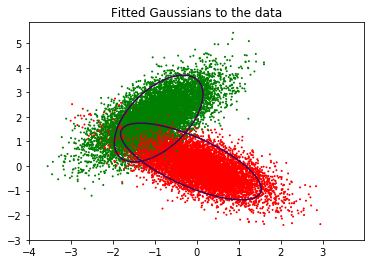

In [7]:
#Plotting gaussians
delta = 0.025
xm = np.arange(-4.0, 4.0, delta)
ym = np.arange(-3.0, 5.0, delta)
Xm, Ym = np.meshgrid(xm, ym)
Z1 = mlab.bivariate_normal(Xm, Ym, 
                           mixture.dists["dist0"].sigma[0,0], 
                           mixture.dists["dist0"].sigma[1,1], 
                           mixture.dists["dist0"].mu[0], 
                           mixture.dists["dist0"].mu[1],
                           mixture.dists["dist0"].sigma[0,1])
Z2 = mlab.bivariate_normal(Xm, Ym, 
                           mixture.dists["dist1"].sigma[0,0], 
                           mixture.dists["dist1"].sigma[1,1], 
                           mixture.dists["dist1"].mu[0], 
                           mixture.dists["dist1"].mu[1],
                           mixture.dists["dist1"].sigma[0,1])
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=label_train, 
                 cmap=matplotlib.colors.ListedColormap(colors), s = 1)
CS = plt.contour(Xm, Ym, Z1, levels = [0.05])
CS2 = plt.contour(Xm, Ym, Z2, levels = [0.05])
plt.title('Fitted Gaussians to the data')

* Use naive Bayesian classification to build the Confusion Matrix of your experiments

In [8]:
def classify(X, mixture):
    """
    Uses Naive Bayes classification with two gaussian distributions in "mixture"
    """
    Y = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        x = X[i, :].reshape((X.shape[1], 1))
        if mixture.dists["dist0"].pdf(x) > mixture.dists["dist1"].pdf(x):
            Y[i] = 1
        else:
            Y[i] = 0
    return Y

In [9]:
y_pred_train1 = classify(X_train, mixture)
y_pred_test1 = classify(X_test, mixture)
metrics.print_metrics(y_train, y_pred_train1, "GM Classifier train set")

GM Classifier train set
Conf_matrix:
[[  378.  8104.]
 [ 8629.   889.]]
Accuracy:
0.07038888888888889
F1_score:
0.04322717136485791


In [10]:
metrics.print_metrics(y_test, y_pred_test1, "GM Classifier test set")

GM Classifier test set
Conf_matrix:
[[  44.  912.]
 [ 949.   95.]]
Accuracy:
0.0695
F1_score:
0.04515135967162648


## Part 4:

Now, that you have the concept of k-Cross Validation and Confusion Matrix. Please using
your previous algorithms

1. Linear Regression under Gradient Descent
2. Logistic Regression under Newton-Raphson

and data sets, please divide the data sets in training, validation and testing data sets and
provide the results for your previous experiments in terms of
1. Confusion Matrix
2. Accuracy and $F_1$ score
3. ROC curves

### Linear Regression

In [11]:
clf = Classifiers.LinearClassifier()
clf.fit(X_train, y_train, solver="gradient",step_size= 0.00001, 
        tresh = 0.00001, max_iter = 10000, reg = 1, print_val=True)

steps: 10000


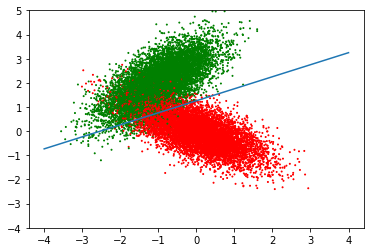

In [12]:
x = np.linspace(-4,4,100)
# -0.5 to compensate the offset of classification
y =  -1/clf.coef[2] * (clf.coef[0] - 0.5 + clf.coef[1]* x)
fig = plt.figure(figsize=(6, 4))
plt.scatter(X_train[:,0], X_train[:,1], c=label_train, 
                 cmap=matplotlib.colors.ListedColormap(colors), s = 1)
plt.ylim((-4,5))
plt.plot(x,y)

In [13]:
y_train_pred2 = clf.predict(X_train)
y_test_pred2 = clf.predict(X_test)

Confussion matrix for training set

In [14]:
metrics.print_metrics(y_train, y_train_pred2, "Lin_reg train set")

Lin_reg train set
Conf_matrix:
[[ 8754.  1024.]
 [  253.  7969.]]
Accuracy:
0.9290555555555555
F1_score:
0.9320202289060421


Confussion matrix for test test

In [15]:
metrics.print_metrics(y_test, y_test_pred2, "Lin_reg test set")

Lin_reg test set
Conf_matrix:
[[ 965.  111.]
 [  28.  896.]]
Accuracy:
0.9305
F1_score:
0.9328177863702272


### Logistic Regression

In [16]:
clf2 = logreg.Logistic_Regression()
clf2.fit(X, Y, solver="gradient",step_size= 0.00001, 
         tresh = 0.00001, max_iter = 3000, reg = 100, print_val=True)

steps: 3000


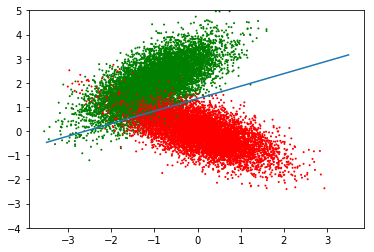

In [17]:
x = np.linspace(-3.5,3.5,100)
y =  -1/clf2.coef[2] * (clf2.coef[0] + clf2.coef[1]* x)
fig = plt.figure(figsize=(6, 4))
plt.scatter(X_train[:,0], X_train[:,1], c=label_train, 
                 cmap=matplotlib.colors.ListedColormap(colors), s = 1)
plt.ylim((-4,5))
plt.plot(x,y)

In [18]:
y_train_pred3 = clf2.predict(X_train)
y_test_pred3 = clf2.predict(X_test)

Confussion matrix for training set

In [19]:
metrics.print_metrics(y_train, y_train_pred3, "Log_reg train set")

Log_reg train set
Conf_matrix:
[[ 8701.   906.]
 [  306.  8087.]]
Accuracy:
0.9326666666666666
F1_score:
0.934887718921242


Confussion matrix for test test

In [20]:
metrics.print_metrics(y_test, y_test_pred3, "Log_reg test set")

Log_reg test set
Conf_matrix:
[[ 956.   94.]
 [  37.  913.]]
Accuracy:
0.9345
F1_score:
0.9358786098874204


### ROC Curves for classifiers

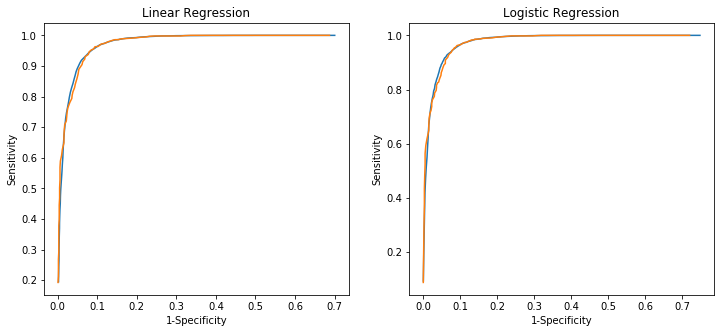

In [21]:
rocstrain1 = clf.roc(X_train, y_train)
rocstest1 = clf.roc(X_test, y_test)
rocstrain2 = clf2.roc(X_train, y_train)
rocstest2 = clf2.roc(X_test, y_test)

f, axarr = plt.subplots(1, 2, figsize=(12,5))
axarr[0].plot(rocstrain1[:,0], rocstrain1[:,1])
axarr[0].plot(rocstest1[:,0], rocstest1[:,1])
axarr[0].set_title("Linear Regression")
axarr[0].set_xlabel("1-Specificity")
axarr[0].set_ylabel("Sensitivity")
axarr[1].plot(rocstrain2[:,0], rocstrain2[:,1])
axarr[1].plot(rocstest2[:,0], rocstest2[:,1])
axarr[1].set_title("Logistic Regression")
axarr[1].set_xlabel("1-Specificity")
axarr[1].set_ylabel("Sensitivity")
plt.show()